In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-csv/insurance.csv


In [3]:
'''
Step-01: Importing libraries
Step-02: Read the data
Step-03: Check tha shape of the data
Step-04: View the samples
Step-05: Basic EDA
Step-06: To check null values
Step-07: Data Processing- Converting categorical into numerical
Step-08: Train Test Split
Step-09: Training the model
Step-10: Testing the model
Step-11: Calculating the mean squared error loss and accuarcy (R2 Score)
'''

'\nStep-01: Importing libraries\nStep-02: Read the data\nStep-03: Check tha shape of the data\nStep-04: View the samples\nStep-05: Basic EDA\nStep-06: To check null values\nStep-07: Data Processing- Converting categorical into numerical\nStep-08: Train Test Split\nStep-09: Training the model\nStep-10: Testing the model\nStep-11: Calculating the mean squared error loss and accuarcy (R2 Score)\n'

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
#set figure size
plt.rcParams['figure.figsize']=[8,5]

In [5]:
df=pd.read_csv('/kaggle/input/insurance-csv/insurance.csv')

In [6]:
df.shape

(1338, 7)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Eda with bmi and expenses

Text(0.5, 1.0, 'BMI vs Expenses')

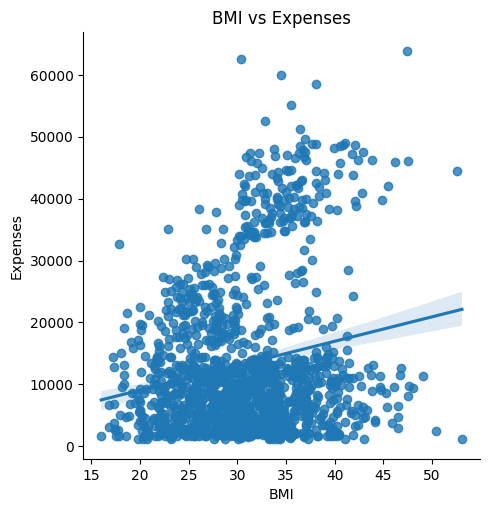

In [8]:
# plotting between bmi(continuous) and expenses(continuous)
#lmplot- used for creating scatter plots with a linear regression fit, visualize the relationship between two variables and assess the strength and direction of the linear relationship
sns.lmplot(x='bmi',y='expenses',data=df)
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.title('BMI vs Expenses')

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: >

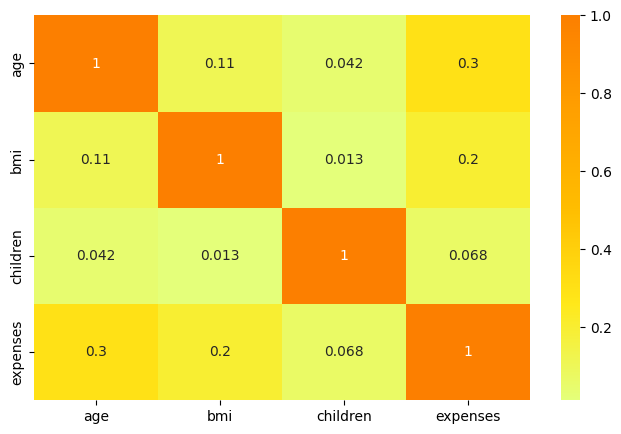

In [11]:
#correlation plot
#Correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)
#annot displays the correlation coefficients on the heatmap.
#cmap sets the color map for the heatmap

<Axes: xlabel='expenses', ylabel='Count'>

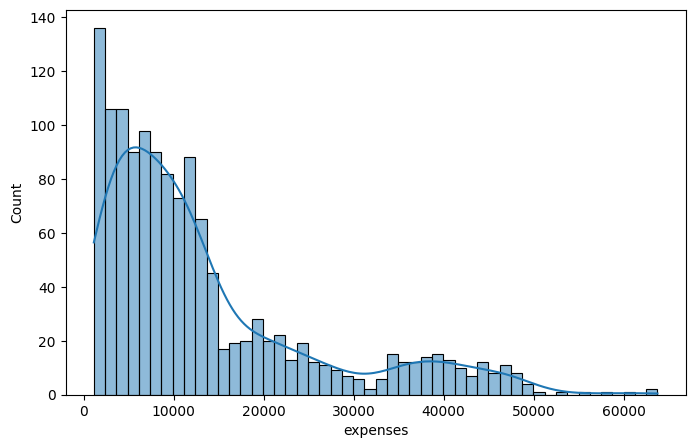

In [12]:
sns.histplot(df['expenses'],kde=True,bins=50,fill=True)
#to remove skewness

<Axes: xlabel='expenses', ylabel='Count'>

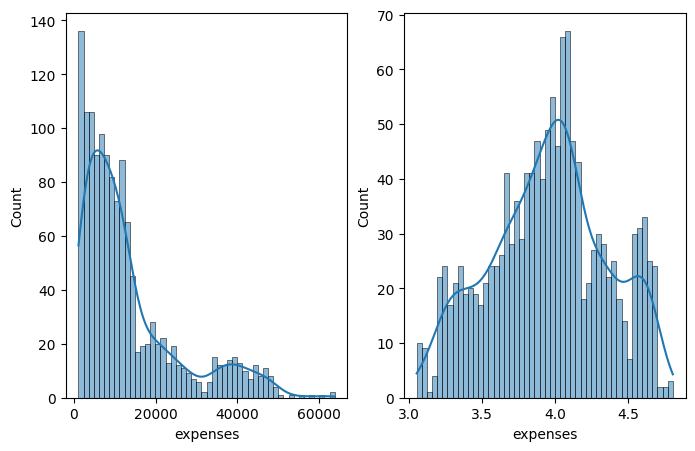

In [13]:
#log transformations
fig,(ax1,ax2) = plt.subplots(ncols=2)
## target variable
sns.histplot(df['expenses'],kde=True,bins=50,fill=True,ax=ax1)
## data is rightskewed -- 
## To correct the skewness in the data, we perform log transformation
sns.histplot(np.log10(df['expenses']),kde=True,bins=50,fill=True,ax=ax2)

<Axes: xlabel='smoker', ylabel='expenses'>

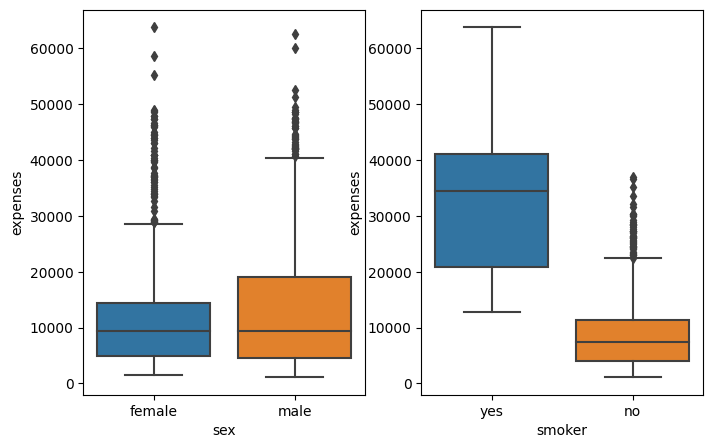

In [14]:
## plot smoker with expenses and sex with expenses
fig,(ax1,ax2) = plt.subplots(ncols=2)

sns.boxplot(x='sex',y='expenses',data=df,ax=ax1)
sns.boxplot(x='smoker',y='expenses',data=df,ax=ax2)

<Axes: xlabel='children', ylabel='expenses'>

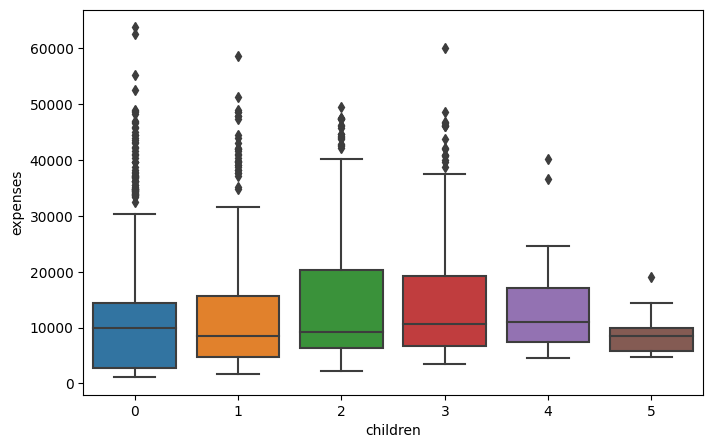

In [15]:
#children vs expenses
df['children'].unique()
sns.boxplot(x='children',y='expenses',data=df)

Data Preprocessing- Encoding

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [17]:
categorical_cols=['sex','children','smoker','region']

#OHE means One hot encoding used in machine learning to represent categorical variables as binary vectors
pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',columns=categorical_cols,dtype='int8')

# shows in sex male and female but only one can be used so we use drop_first=True

,age,bmi,expenses,OHE_female,OHE_male,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,16884.92,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.8,1725.55,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.0,4449.46,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.7,21984.47,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.9,3866.86,0,1,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,10600.55,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1334,18,31.9,2205.98,1,0,1,0,0,0,0,0,1,0,1,0,0,0
1335,18,36.9,1629.83,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1336,21,25.8,2007.95,1,0,1,0,0,0,0,0,1,0,0,0,0,1


In [18]:
categorical_cols=['sex','children','smoker','region']

#One hot encoding
df_encoded=pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',columns=categorical_cols,drop_first=True,dtype='int8')
df_encoded.head()

,age,bmi,expenses,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0


<Axes: xlabel='expenses', ylabel='Count'>

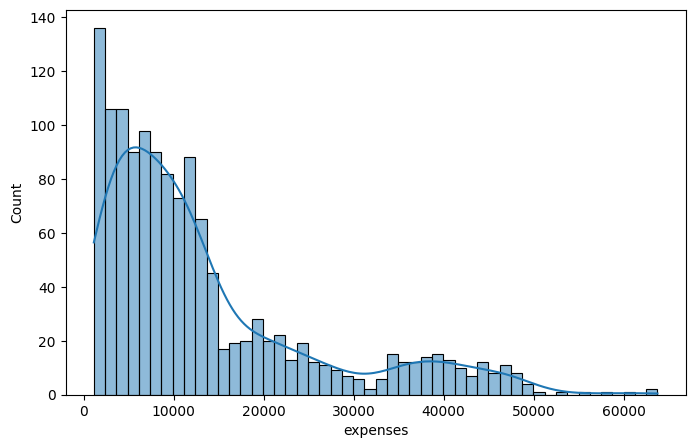

In [19]:
sns.histplot(df_encoded['expenses'],kde=True,bins=50)

In [20]:
#to remove skewness in expenses we are dng log transformations
df_encoded['expenses']=np.log10(df_encoded['expenses'])
df_encoded.head()

,age,bmi,expenses,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.8,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.0,3.648307,1,0,0,1,0,0,0,0,1,0
3,33,22.7,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3.587358,1,0,0,0,0,0,0,1,0,0


In [21]:
x=df_encoded.drop(['expenses'],axis=1)  # input features
y=df_encoded['expenses']   #target feature

In [22]:
#np.random.seed(42)
np.random.randn(2,1)

array([[ 2.02509784],
       [-1.68819595]])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

Training model

In [24]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
lin_reg.coef_

array([ 0.01439   ,  0.00586443, -0.02942492,  0.06491884,  0.11854455,
        0.10599653,  0.22731832,  0.20242934,  0.67334732, -0.02425792,
       -0.06363452, -0.05796023])

In [26]:
lin_reg.intercept_

3.0659143017746633

Test the Model

In [27]:
y_pred=lin_reg.predict(x_test)
y_pred

array([4.05112066, 3.76298201, 4.49447576, 3.9460994 , 3.65154629,
       3.90021733, 4.66880515, 3.71778711, 4.11973069, 4.7581596 ,
       3.52988373, 4.79371652, 3.56077283, 4.1018741 , 3.82467665,
       3.70602383, 3.74941064, 3.52255126, 4.53482427, 4.53635789,
       4.86539761, 3.97741384, 3.84942359, 3.99035739, 4.59915666,
       3.69586719, 3.71478017, 4.17597255, 3.46755126, 3.96032211,
       4.07719523, 3.54703024, 3.65018288, 4.10458172, 3.81117558,
       4.267052  , 4.06897759, 3.92132927, 3.99923225, 3.64327211,
       3.99421781, 4.60150132, 3.99164685, 4.58596853, 4.02162097,
       4.0384076 , 3.67915156, 3.71629337, 3.93690869, 3.77565697,
       4.08865918, 3.84203027, 3.96883348, 3.60518769, 3.66614202,
       4.06209973, 4.02070535, 3.98125288, 3.83188125, 4.17767457,
       4.32176071, 3.68865734, 3.43361112, 3.66619434, 3.53383957,
       3.7463988 , 3.48590731, 3.45061796, 3.66138378, 4.10651906,
       3.7693639 , 4.59205838, 3.94064437, 4.48673965, 3.48365

In [28]:
mean_squared_error(y_pred,y_test) #loss is 0.03

0.03532422216716675

R2 Square

In [29]:
lin_reg.score(x_test,y_test) # 0.779*100 - 77.9% accurate

0.7795814253322966

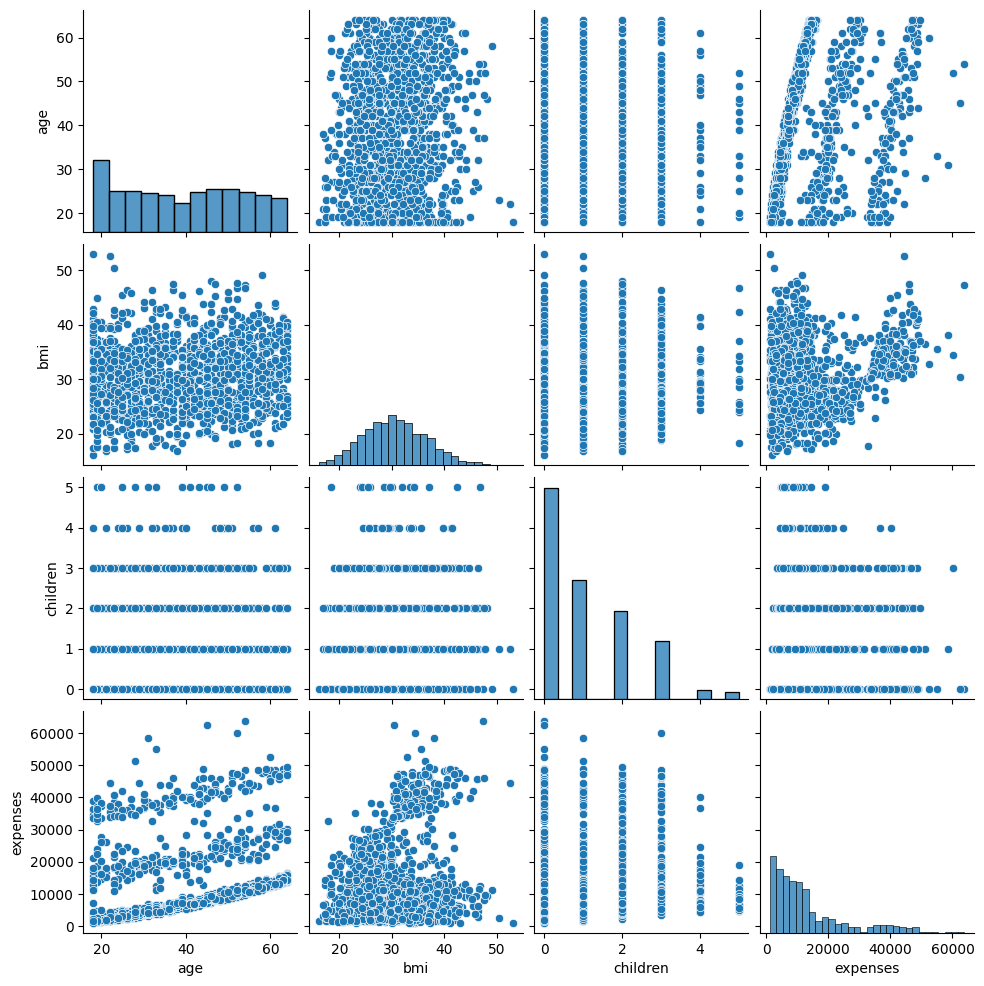

In [30]:
#pairplot
sns.pairplot(df)

In [31]:
a=df.iloc[:,0:-1]   #select all rows (:) and all columns from the first column (0) up to, but not including, the last column (-1)
b=df.iloc[:,-1]     # selects all rows and only last one columnrr


In [32]:
a

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [33]:
b

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [1]:
import statsmodels.api as sm

In [34]:
a=sm.add_constant(a)

In [35]:
a

,const,age,sex,bmi,children,smoker,region
0,1.0,19,female,27.9,0,yes,southwest
1,1.0,18,male,33.8,1,no,southeast
2,1.0,28,male,33.0,3,no,southeast
3,1.0,33,male,22.7,0,no,northwest
4,1.0,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...,...
1333,1.0,50,male,31.0,3,no,northwest
1334,1.0,18,female,31.9,0,no,northeast
1335,1.0,18,female,36.9,0,no,southeast
1336,1.0,21,female,25.8,0,no,southwest


In [36]:
a.drop(['region'],axis=1,inplace=True)

In [39]:
categorical_columns=['sex','children','smoker']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
a[categorical_columns]=a[categorical_columns].apply(lambda col:le.fit_transform(col))

In [41]:
a

,const,age,sex,bmi,children,smoker
0,1.0,19,0,27.9,0,1
1,1.0,18,1,33.8,1,0
2,1.0,28,1,33.0,3,0
3,1.0,33,1,22.7,0,0
4,1.0,32,1,28.9,0,0
...,...,...,...,...,...,...
1333,1.0,50,1,31.0,3,0
1334,1.0,18,0,31.9,0,0
1335,1.0,18,0,36.9,0,0
1336,1.0,21,0,25.8,0,0


In [42]:
result=sm.OLS(b,a).fit()

In [43]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.1
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:53:04   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.206e+04    951.231    -12.673      0.0

In [44]:
a.drop(['sex'],axis=1,inplace=True)

In [45]:
result=sm.OLS(b,a).fit()    #Ordinary least Square

In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.2
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:54:41   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.211e+04    941.954    -12.851      0.0